# Convolutional NN

In [1]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot

from src.si.data import Dataset
from src.si.util.util import to_categorical

Load the MNIST dataset

In [2]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [3]:
train,test = load_mnist(500)

In [4]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [5]:
preprocess(train)
preprocess(test)

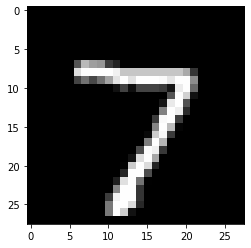

In [6]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [7]:
from si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten
from si.util.activation import Tanh, Sigmoid

Build the model

In [8]:
net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))  # ao fazer a convolução
# a janela, que é 3x3, nao consegue passar na matriz inteira, nomeadamente
# nos ultimos dois elemenos, daí este dense passar a ser 26x26
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [9]:
net.fit(train)

epoch 1/500 error=0.39788916504386795
epoch 2/500 error=0.36598948614326093
epoch 3/500 error=0.33498558431539205
epoch 4/500 error=0.30914602633522953
epoch 5/500 error=0.2893346899534231
epoch 6/500 error=0.2738598221775673
epoch 7/500 error=0.2612505764249672
epoch 8/500 error=0.2506109473719385
epoch 9/500 error=0.24128910180760804
epoch 10/500 error=0.23282412602072283
epoch 11/500 error=0.22491088742985915
epoch 12/500 error=0.21734655227367394
epoch 13/500 error=0.20999075469499143
epoch 14/500 error=0.20274079877869666
epoch 15/500 error=0.1955164031691047
epoch 16/500 error=0.18825097921651593
epoch 17/500 error=0.18088872128624606
epoch 18/500 error=0.17338831882299852
epoch 19/500 error=0.16573490513676065
epoch 20/500 error=0.1579606110115385
epoch 21/500 error=0.15016658998748894
epoch 22/500 error=0.1425301675138368
epoch 23/500 error=0.13528363232862808
epoch 24/500 error=0.12866303934097806
epoch 25/500 error=0.12284343614705465
epoch 26/500 error=0.11789633440008067
ep

In [10]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
conv = net.layers[0]

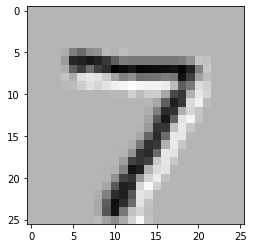

In [12]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))

Add maxpooling layer

In [13]:
from src.si.supervised.nn import MaxPooling

net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))  # sairá como 26*26*1
net.add(Activation(Tanh()))  # crash aqui logo no primeiro backpropagation
# ter em atenção  dimensão do pooling
net.add(MaxPooling((2, 2)))  # esta esta a correr, sairá como 13*13*1
net.add(Activation(Tanh()))
net.add(Flatten())  # fica um vetor 1D
net.add(Dense(13*13*1, 100))
net.add(Activation(Tanh()))
net.add(Dense(100, 10))
net.add(Activation(Sigmoid()))

Train model again

epoch 1/500 error=0.2990300486738439
epoch 2/500 error=0.28645893408773265
epoch 3/500 error=0.2770091352355033
epoch 4/500 error=0.2687607949106206
epoch 5/500 error=0.2607512958924304
epoch 6/500 error=0.25254427182393335
epoch 7/500 error=0.24391761606410672
epoch 8/500 error=0.23476346259705996
epoch 9/500 error=0.22504987529662174
epoch 10/500 error=0.21480228056285466
epoch 11/500 error=0.20410333231234024
epoch 12/500 error=0.1930990691897591
epoch 13/500 error=0.18197165971415058
epoch 14/500 error=0.17094351184072615
epoch 15/500 error=0.16024396045259276
epoch 16/500 error=0.15009206032112457
epoch 17/500 error=0.14069279170240573
epoch 18/500 error=0.13222757115050796
epoch 19/500 error=0.12482536185771602
epoch 20/500 error=0.11853907341819973
epoch 21/500 error=0.11334301160724373
epoch 22/500 error=0.10914158305087138
epoch 23/500 error=0.10578955233630358
epoch 24/500 error=0.10313283041902055
epoch 25/500 error=0.10103055079352133
epoch 26/500 error=0.09935916565927486


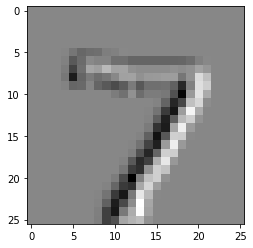

In [14]:
net.fit(train)

conv = net.layers[0]

plot_img(conv.forward(test.X[:1]),shape=(26,26))